In [1]:
import os
from operator import itemgetter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
get_ipython().magic(u'matplotlib inline')
plt.style.use('ggplot')

import tensorflow as tf

from keras import models, regularizers, layers, optimizers, losses, metrics
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical


Sentiment labels indicating positivity or negativity are assigned to movie reviews in the IMDB dataset.

To preprocess the dataset, each review is transformed into a sequence of word embeddings. In this process, each word is represented by a vector of a fixed size.

In [2]:
from keras.layers import Embedding

# The Embedding layer requires a minimum of two inputs:
# The maximum word index plus one, or 1000, is the number of potential tokens.
# and the embeddings' dimensions, in this case 64.
embedd_lay = Embedding(1000, 64)
from keras.datasets import imdb
from keras import preprocessing
from keras.utils import pad_sequences


A custom-trained embedding layer was created with a training sample size of 100.


In [3]:
# The number of words that should be considered as features
fea = 10000
# Remove the text after this number of words(from the top max_features most common words)
length = 150

# Data loading to integers
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=fea)

x_train = x_train[:100]
y_train = y_train[:100]

# The integer lists are now transformed into a 2D integer tensor with the shape of {(samples, maxlen)}.
x_train = pad_sequences(x_train, maxlen=length)
x_test = pad_sequences(x_test, maxlen=length)
from keras.models import Sequential
from keras.layers import Flatten, Dense

model1 = Sequential()
# In order to finally flatten the embedded inputs, the maximum length of the input to the Embedding layer is provided.
model1.add(Embedding(10000, 8, input_length=length))
# After the Embedding layer, our activations have shape `(samples, maxlen, 8)`.

# We flatten the 3D tensor of embeddings into a 2D tensor of shape
#`(samples, maxlen * 8)`
model1.add(Flatten())

# We add the classifier on top
model1.add(Dense(1, activation='sigmoid'))
model1.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model1.summary()

history1 = model1.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

17464789/17464789 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 150, 8)            80000     
                                                                 
 flatten (Flatten)           (None, 1200)              0         
                                                                 
 dense (Dense)               (None, 1)                 1201      
                                                                 
Total params: 81201 (317.19 KB)
Trainable params: 81201 (317.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
3/3 [==============================] - 3s 205ms/step - loss: 0.6951 - acc: 0.4875 - val_loss: 0.6831 - val_acc: 0.6000
Epoch 2/10
3/3 [==============================] - 0s 123ms/step - loss: 0.6714 - acc: 0

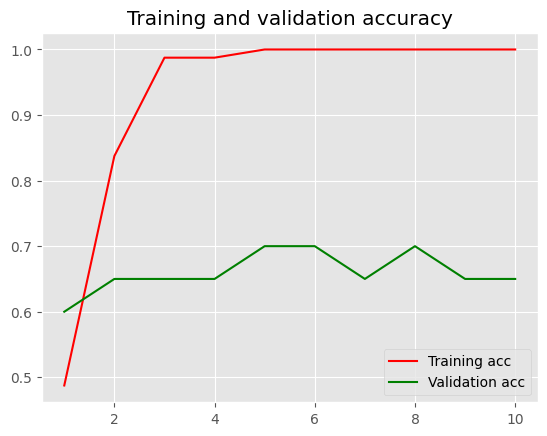

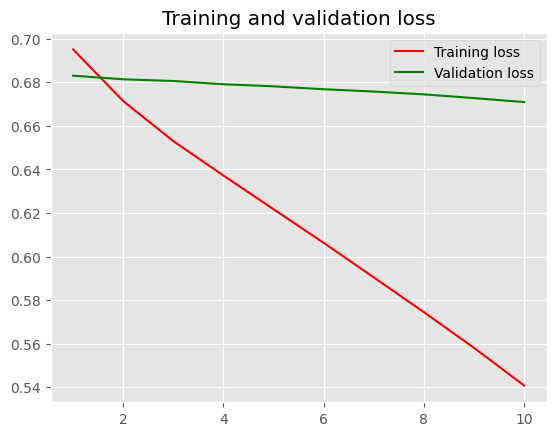

In [4]:
import matplotlib.pyplot as plt

# Train accuracy
tra_acc = history1.history["acc"]
# Validation accuracy
val_acc = history1.history["val_acc"]
# Train loss
tra_loss = history1.history["loss"]
# Validation loss
val_loss = history1.history["val_loss"]


epochs = range(1, len(tra_acc) + 1)

plt.plot(epochs, tra_acc, "red", label = "Training acc")
plt.plot(epochs, val_acc, "g", label = "Validation acc")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, tra_loss, "red", label = "Training loss")
plt.plot(epochs, val_loss, "g", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

In [5]:
test_loss, test_acc = model1.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

782/782 [==============================] - 2s 2ms/step - loss: 0.6936 - acc: 0.5023
Test loss: 0.693622350692749
Test accuracy: 0.5023199915885925



A custom-trained embedding layer was created with a training sample size of 5000

In [6]:
fea=10000
length=150
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=fea)

x_train = pad_sequences(x_train, maxlen=length)
x_test = pad_sequences(x_test, maxlen=length)

texts = np.concatenate((x_train, x_test), axis=0)
labels = np.concatenate((x_train, x_test), axis=0)

x_train = x_train[:5000]
y_train = y_train[:5000]

In [7]:
model2 = Sequential()
model2.add(Embedding(10000, 8, input_length=length))
model2.add(Flatten())
model2.add(Dense(1, activation='sigmoid'))
model2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model2.summary()
history2 = model2.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 150, 8)            80000     
                                                                 
 flatten_1 (Flatten)         (None, 1200)              0         
                                                                 
 dense_1 (Dense)             (None, 1)                 1201      
                                                                 
Total params: 81201 (317.19 KB)
Trainable params: 81201 (317.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
125/125 [==============================] - 10s 79ms/step - loss: 0.6925 - acc: 0.5102 - val_loss: 0.6891 - val_acc: 0.5650
Epoch 2/10
125/125 [==============================] - 5s 39ms/step - loss: 0.6678 - acc: 0.7452 - val_loss: 0.6702 - val_acc: 0.6650
Epoch 3/10
12

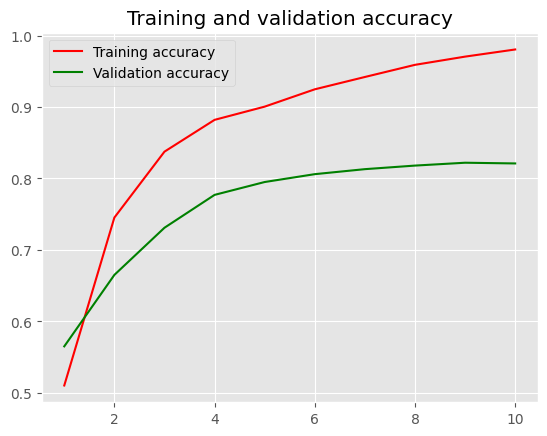

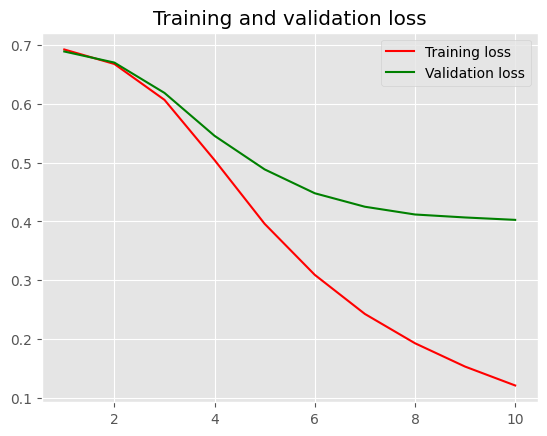

In [8]:
tra_acc2 = history2.history['acc']
val_acc2 = history2.history['val_acc']
tra_loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

epochs = range(1, len(tra_acc2) + 1)

plt.plot(epochs, tra_acc2, 'r', label='Training accuracy')
plt.plot(epochs, val_acc2, 'g', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, tra_loss2, 'r', label='Training loss')
plt.plot(epochs, val_loss2, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [9]:
test_loss2, test_accuracy2 = model2.evaluate(x_test, y_test)
print('Test loss:', test_loss2)
print('Test accuracy:', test_accuracy2)

782/782 [==============================] - 2s 2ms/step - loss: 0.3718 - acc: 0.8310
Test loss: 0.37180960178375244
Test accuracy: 0.8309999704360962



A custom-trained embedding layer was created with a training sample size of 1000

In [10]:
fea=10000
length=150
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=fea)

x_train = pad_sequences(x_train, maxlen=length)
x_test = pad_sequences(x_test, maxlen=length)

texts = np.concatenate((x_train, x_test), axis=0)
labels = np.concatenate((x_train, x_test), axis=0)

x_train = x_train[:1000]
y_train = y_train[:1000]

In [11]:
model3 = Sequential()
model3.add(Embedding(10000, 8, input_length=length))
model3.add(Flatten())
model3.add(Dense(1, activation='sigmoid'))
model3.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model3.summary()
history3 = model3.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 150, 8)            80000     
                                                                 
 flatten_2 (Flatten)         (None, 1200)              0         
                                                                 
 dense_2 (Dense)             (None, 1)                 1201      
                                                                 
Total params: 81201 (317.19 KB)
Trainable params: 81201 (317.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
25/25 [==============================] - 2s 71ms/step - loss: 0.6929 - acc: 0.5063 - val_loss: 0.6922 - val_acc: 0.5050
Epoch 2/10
25/25 [==============================] - 2s 64ms/step - loss: 0.6762 - acc: 0.7675 - val_loss: 0.6916 - val_acc: 0.5100
Epoch 3/10
25/25 [

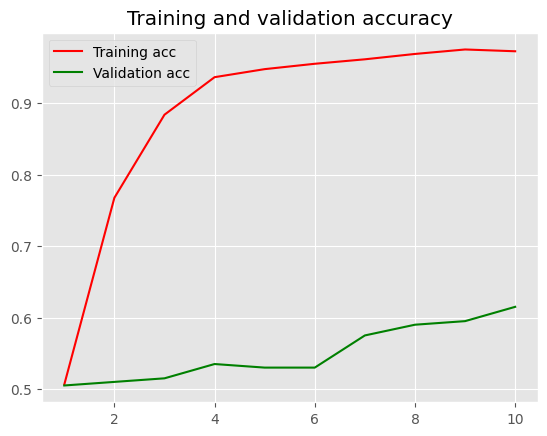

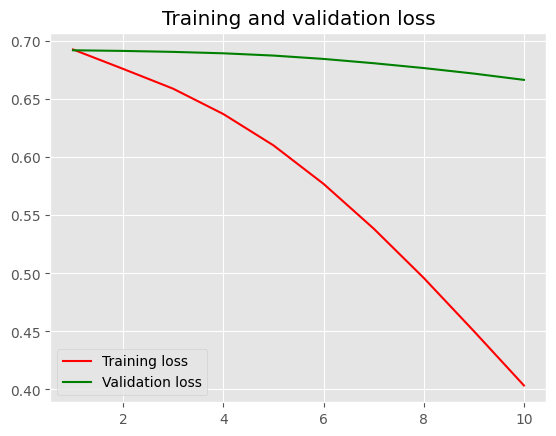

In [12]:
tra_acc3 = history3.history["acc"]
val_acc3 = history3.history["val_acc"]
tra_loss3 = history3.history["loss"]
val_loss3 = history3.history["val_loss"]

epochs = range(1, len(tra_acc3) + 1)

plt.plot(epochs, tra_acc3, "r", label = "Training acc")
plt.plot(epochs, val_acc3, "g", label = "Validation acc")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, tra_loss3, "red", label = "Training loss")
plt.plot(epochs, val_loss3, "g", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

In [13]:
test_loss3, test_accuracy3 = model3.evaluate(x_test, y_test)
print('Test loss:', test_loss3)
print('Test accuracy:', test_accuracy3)

782/782 [==============================] - 2s 2ms/step - loss: 0.6613 - acc: 0.6178
Test loss: 0.6613208651542664
Test accuracy: 0.6177600026130676



A custom-trained embedding layer was created with a training sample size of 10000

In [14]:
fea=10000
length=150
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=fea)

x_train = pad_sequences(x_train, maxlen=length)
x_test = pad_sequences(x_test, maxlen=length)

texts = np.concatenate((x_train, x_test), axis=0)
labels = np.concatenate((x_train, x_test), axis=0)

x_train = x_train[:10000]
y_train = y_train[:10000]

In [15]:
model4 = Sequential()
model4.add(Embedding(10000, 8, input_length=length))
model4.add(Flatten())
model4.add(Dense(1, activation='sigmoid'))
model4.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model4.summary()
history4 = model4.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 150, 8)            80000     
                                                                 
 flatten_3 (Flatten)         (None, 1200)              0         
                                                                 
 dense_3 (Dense)             (None, 1)                 1201      
                                                                 
Total params: 81201 (317.19 KB)
Trainable params: 81201 (317.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
250/250 [==============================] - 11s 42ms/step - loss: 0.6919 - acc: 0.5150 - val_loss: 0.6853 - val_acc: 0.5890
Epoch 2/10
250/250 [==============================] - 5s 21ms/step - loss: 0.6352 - acc: 0.7540 - val_loss: 0.5880 - val_acc: 0.7745
Epoch 3/10
25

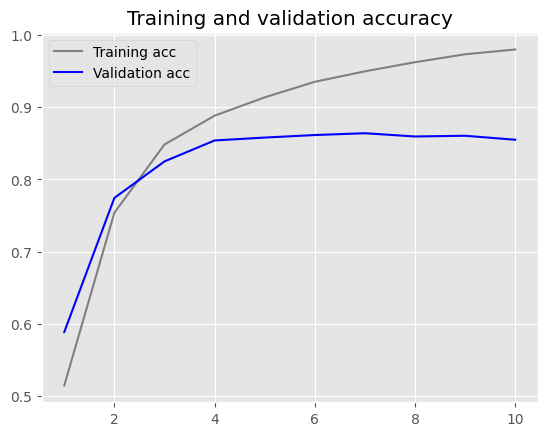

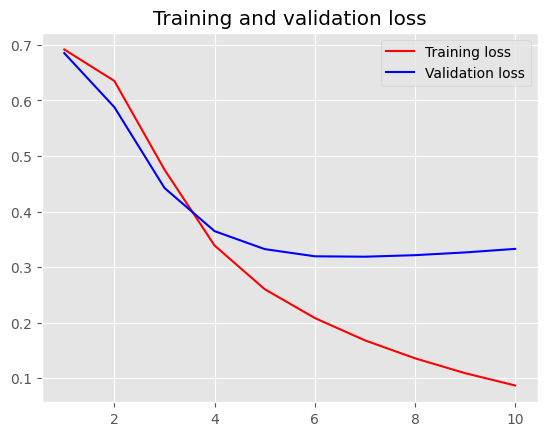

In [16]:
tra_acc4 = history4.history["acc"]
val_acc4 = history4.history["val_acc"]
tra_loss4 = history4.history["loss"]
val_loss4 = history4.history["val_loss"]

epochs = range(1, len(tra_acc4) + 1)

plt.plot(epochs, tra_acc4, "grey", label = "Training acc")
plt.plot(epochs, val_acc4, "b", label = "Validation acc")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, tra_loss4, "red", label = "Training loss")
plt.plot(epochs, val_loss4, "b", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

In [17]:
test_loss4, test_accuracy4 = model4.evaluate(x_test, y_test)
print('Test loss:', test_loss4)
print('Test accuracy:', test_accuracy4)

782/782 [==============================] - 2s 2ms/step - loss: 0.3360 - acc: 0.8550
Test loss: 0.3359987437725067
Test accuracy: 0.8550000190734863


In [18]:
!curl -O https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar -xf aclImdb_v1.tar.gz
!rm -r aclImdb/train/unsup

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 80.2M  100 80.2M    0     0  5337k      0  0:00:15  0:00:15 --:--:-- 12.3M


In [19]:
import os
import shutil

imdb = 'aclImdb'
training = os.path.join(imdb, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(training, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding='utf-8')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

If the available training data isn't sufficient to generate word embeddings tailored to the specific problem you're addressing, you can opt for pretrained word embeddings instead.





Tokenizing the data

In [20]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
import numpy as np

length2 = 150 # cut off review after 150 words
tra_info = 100 # Training sample 100
val_info = 10000 # Validation sample 10000
words = 10000 # Considers only the top 10000 words in the dataset

tokenizer1 = Tokenizer(num_words=words)
tokenizer1.fit_on_texts(texts)
sequences = tokenizer1.texts_to_sequences(texts)
word_index = tokenizer1.word_index
print("Found %s unique tokens." % len(word_index))

data = pad_sequences(sequences, maxlen=length2)

labels = np.asarray(labels)
print("Shape of data tensor:", data.shape)
print("Shape of label tensor:", labels.shape)
# Splits data into training and validation set, but shuffles is, since samples are ordered:
# all negatives first, then all positive
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:tra_info] # (200, 100)
y_train = labels[:tra_info] # shape (200,)
x_validation = data[tra_info:tra_info+val_info] # shape (10000, 100)
y_validation = labels[tra_info:tra_info+val_info] # shape (10000,)

Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


Setting up and installing the GloVe word embedding.

In [21]:
import numpy as np
import requests
from io import BytesIO
import zipfile

glove_url = 'https://nlp.stanford.edu/data/glove.6B.zip'  # URL to download GloVe embeddings
glove_zip = requests.get(glove_url)

# Unzip the contents
with zipfile.ZipFile(BytesIO(glove_zip.content)) as z:
    z.extractall('/content/glove')

# Loading GloVe embeddings into memory
embeddings_index = {}
with open('/content/glove/glove.6B.100d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))


Found 400000 word vectors.


We utilized the 6B version of the GloVe model, trained on a combination of Wikipedia data and Gigaword 5 corpus, comprising 6 billion tokens and encompassing 400,000 words.

Creating the GloVe word embeddings matrix.

Using a pretrained word embedding layer with a training sample size of 100.

In [22]:
embedding_di = 100

embedding_matrix = np.zeros((words, embedding_di))
for word, i in word_index.items():
    embedd_vector = embeddings_index.get(word)
    if i < words:
        if embedd_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedd_vector

In [23]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(words, embedding_di, input_length=length2))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 150, 100)          1000000   
                                                                 
 flatten_4 (Flatten)         (None, 15000)             0         
                                                                 
 dense_4 (Dense)             (None, 32)                480032    
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1480065 (5.65 MB)
Trainable params: 1480065 (5.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

The Embedding layer loads the pretrained word embedding. By setting it to False when invoking the Embedding layer, it ensures that the embedding is not trainable. If you set trainable = True, the optimization method might alter the word embedding values. It's advisable to keep pretrained sections unchanged during student training to prevent them from forgetting previously learned information.

In [25]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_validation, y_validation))
model.save_weights('pre_trained_glove_model.h5')

Epoch 1/10
4/4 [==============================] - 2s 233ms/step - loss: 2.7435 - acc: 0.4600 - val_loss: 1.1707 - val_acc: 0.4994
Epoch 2/10
4/4 [==============================] - 1s 181ms/step - loss: 0.6100 - acc: 0.5900 - val_loss: 1.2823 - val_acc: 0.4988
Epoch 3/10
4/4 [==============================] - 1s 180ms/step - loss: 0.4371 - acc: 0.7700 - val_loss: 0.6956 - val_acc: 0.5306
Epoch 4/10
4/4 [==============================] - 1s 182ms/step - loss: 0.3394 - acc: 0.8600 - val_loss: 4.4112 - val_acc: 0.4994
Epoch 5/10
4/4 [==============================] - 1s 184ms/step - loss: 0.6264 - acc: 0.8700 - val_loss: 1.1500 - val_acc: 0.5039
Epoch 6/10
4/4 [==============================] - 1s 183ms/step - loss: 0.0955 - acc: 0.9600 - val_loss: 0.9095 - val_acc: 0.5175
Epoch 7/10
4/4 [==============================] - 1s 184ms/step - loss: 0.0272 - acc: 1.0000 - val_loss: 0.9383 - val_acc: 0.5148
Epoch 8/10
4/4 [==============================] - 1s 190ms/step - loss: 0.0208 - acc: 1.00

Due to the limited training data, it's anticipated that the model will overfit rapidly. This phenomenon is evident in the wide range of validation accuracy.

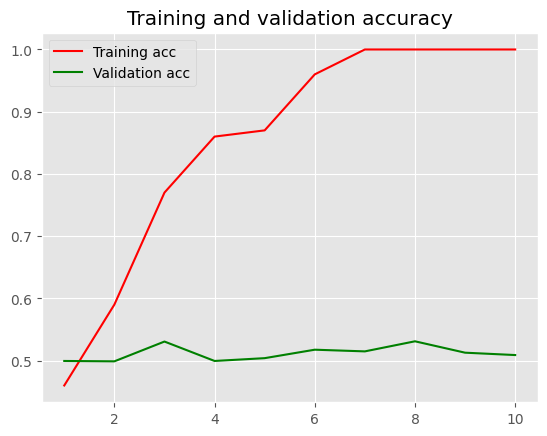

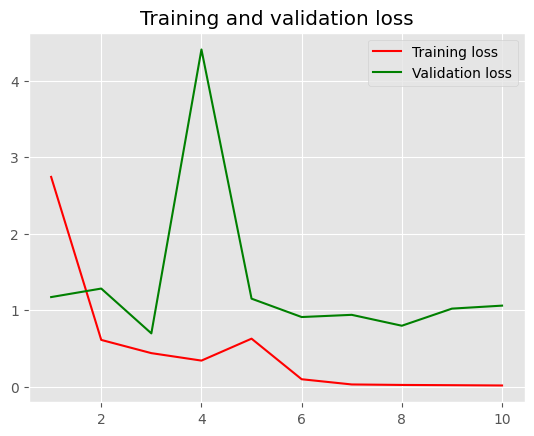

In [26]:
import matplotlib.pyplot as plt

tra_acc = history.history['acc']
val_acc = history.history['val_acc']
tra_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(tra_acc) + 1)

plt.plot(epochs, tra_acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, tra_loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [27]:
test_loss, test_accuracy= model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

782/782 [==============================] - 2s 2ms/step - loss: 1.1559 - acc: 0.4932
Test loss: 1.15593683719635
Test accuracy: 0.4931600093841553


Using a pretrained word embedding layer with a training sample size of 5000.

Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 150, 100)          1000000   
                                                                 
 flatten_5 (Flatten)         (None, 15000)             0         
                                                                 
 dense_6 (Dense)             (None, 32)                480032    
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1480065 (5.65 MB)
Trainable params: 1480065 (5.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
157/157 [==============================] - 

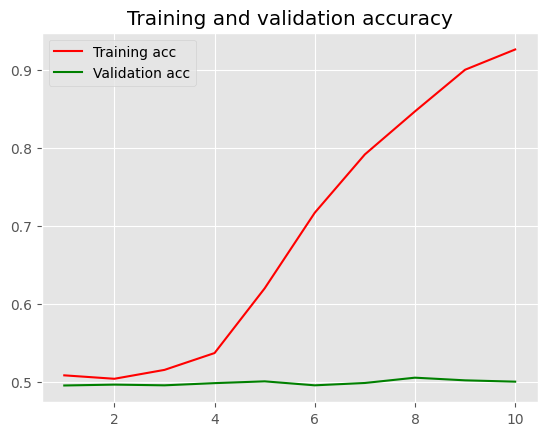

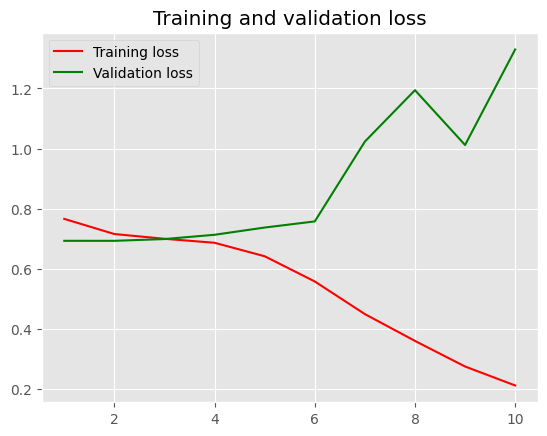

In [28]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
import numpy as np

length2 = 150
tra_info = 5000 # Training sample is 5000
val_info = 10000
words = 10000

tokenizer2 = Tokenizer(num_words=words)
tokenizer2.fit_on_texts(texts)
sequences = tokenizer2.texts_to_sequences(texts)
word_index = tokenizer2.word_index
print("Found %s unique tokens." % len(word_index))

data = pad_sequences(sequences, maxlen=length2)

labels = np.asarray(labels)
print("Shape of data tensor:", data.shape)
print("Shape of label tensor:", labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:tra_info]
y_train = labels[:tra_info]
x_validation = data[tra_info:tra_info+val_info]
y_validation = labels[tra_info:tra_info+val_info]
embedding_di = 100

embedd_matrix = np.zeros((words, embedding_di))
for word, i in word_index.items():
    embedd_vector = embeddings_index.get(word)
    if i < words:
        if embedd_vector is not None:

            embedd_matrix[i] = embedd_vector

from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model11 = Sequential()
model11.add(Embedding(words, embedding_di, input_length=length2))
model11.add(Flatten())
model11.add(Dense(32, activation='relu'))
model11.add(Dense(1, activation='sigmoid'))
model11.summary()

model11.layers[0].set_weights([embedding_matrix])
model11.layers[0].trainable = False
model11.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history11 = model11.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_validation, y_validation))
model11.save_weights('pre_trained_glove_model.h5')
import matplotlib.pyplot as plt

tra_acc1 = history11.history['acc']
val_acc11 = history11.history['val_acc']
tra_loss11 = history11.history['loss']
val_loss11 = history11.history['val_loss']

epochs = range(1, len(tra_acc1) + 1)

plt.plot(epochs, tra_acc1, 'r', label='Training acc')
plt.plot(epochs, val_acc11, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, tra_loss11, 'red', label='Training loss')
plt.plot(epochs, val_loss11, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [29]:
test_loss11, test_accuracy11 = model11.evaluate(x_test, y_test)
print('Test loss:', test_loss11)
print('Test accuracy:', test_accuracy11)

782/782 [==============================] - 2s 2ms/step - loss: 1.3064 - acc: 0.4994
Test loss: 1.3064237833023071
Test accuracy: 0.49935999512672424


Utilizing a pretrained word embedding layer with a training sample size of 1000.

Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 150, 100)          1000000   
                                                                 
 flatten_6 (Flatten)         (None, 15000)             0         
                                                                 
 dense_8 (Dense)             (None, 32)                480032    
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1480065 (5.65 MB)
Trainable params: 1480065 (5.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
32/32 [==============================] - 1s

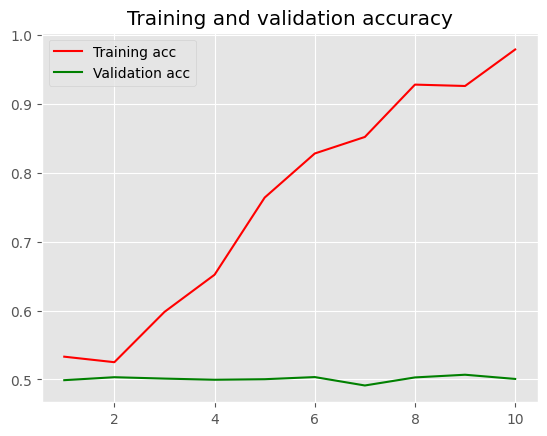

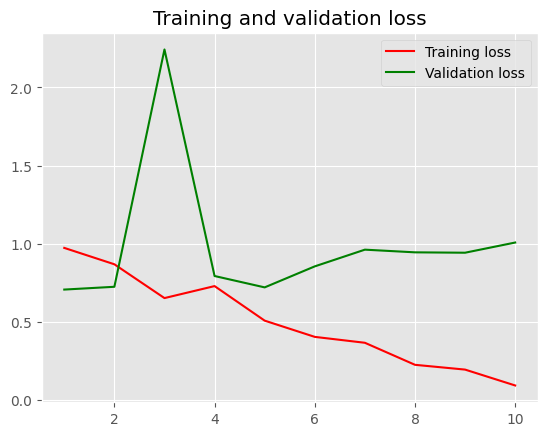

In [30]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
import numpy as np

length = 150
tra_info = 1000 #Trains on 1000 samples
val_info = 10000
words = 10000

tokenizer3 = Tokenizer(num_words=words)
tokenizer3.fit_on_texts(texts)
sequences = tokenizer3.texts_to_sequences(texts)
word_index = tokenizer3.word_index
print("Found %s unique tokens." % len(word_index))

data = pad_sequences(sequences, maxlen=length)

labels = np.asarray(labels)
print("Shape of data tensor:", data.shape)
print("Shape of label tensor:", labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:tra_info]
y_train = labels[:tra_info]
x_val = data[tra_info:tra_info+val_info]
y_val = labels[tra_info:tra_info+val_info]
embedding_di = 100

embedd_matrix = np.zeros((words, embedding_di))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < words:
        if embedding_vector is not None:

            embedd_matrix[i] = embedding_vector

from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model12 = Sequential()
model12.add(Embedding(words, embedding_di, input_length=length))
model12.add(Flatten())
model12.add(Dense(32, activation='relu'))
model12.add(Dense(1, activation='sigmoid'))
model12.summary()

model12.layers[0].set_weights([embedding_matrix])
model12.layers[0].trainable = False
model12.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history12 = model12.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model12.save_weights('pre_trained_glove_model.h5')
import matplotlib.pyplot as plt

tra_acc12 = history12.history['acc']
val_acc12 = history12.history['val_acc']
loss12 = history12.history['loss']
val_loss12 = history12.history['val_loss']

epochs = range(1, len(tra_acc12) + 1)

plt.plot(epochs, tra_acc12, 'r', label='Training acc')
plt.plot(epochs, val_acc12, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss12, 'red', label='Training loss')
plt.plot(epochs, val_loss12, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [31]:
test_loss12, test_accuracy12 = model12.evaluate(x_test, y_test)
print('Test loss:', test_loss12)
print('Test accuracy:', test_accuracy12)

782/782 [==============================] - 2s 2ms/step - loss: 1.0084 - acc: 0.4980
Test loss: 1.0084171295166016
Test accuracy: 0.49796000123023987


Employing a pretrained word embedding layer with a training sample size of 10,000.

Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 150, 100)          1000000   
                                                                 
 flatten_7 (Flatten)         (None, 15000)             0         
                                                                 
 dense_10 (Dense)            (None, 32)                480032    
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1480065 (5.65 MB)
Trainable params: 1480065 (5.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
313/313 [==============================] - 

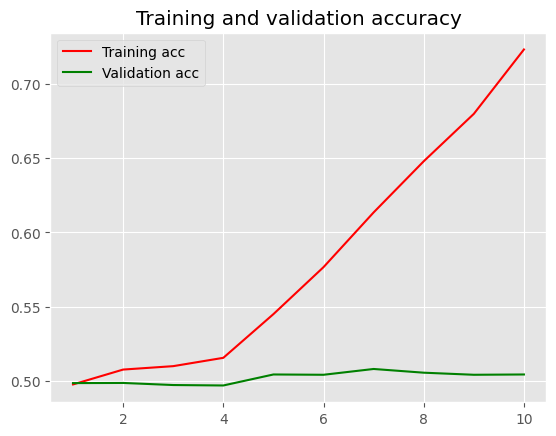

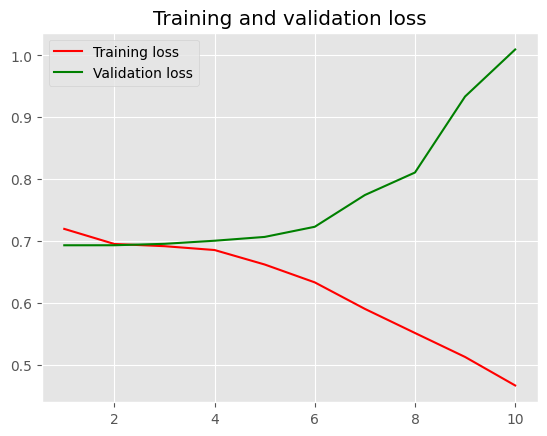

In [32]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
import numpy as np

length = 150
tra_info = 10000 # Trains on 10000 samples
val_info = 10000
words = 10000

tokenizer4 = Tokenizer(num_words=words)
tokenizer4.fit_on_texts(texts)
sequences = tokenizer4.texts_to_sequences(texts)
word_index = tokenizer4.word_index
print("Found %s unique tokens." % len(word_index))

data = pad_sequences(sequences, maxlen=length)

labels = np.asarray(labels)
print("Shape of data tensor:", data.shape)
print("Shape of label tensor:", labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:tra_info]
y_train = labels[:tra_info]
x_val = data[tra_info:tra_info+val_info]
y_val = labels[tra_info:tra_info+val_info]
embedding_di = 100

embedd_matrix = np.zeros((words, embedding_di))
for word, i in word_index.items():
    embedd_vector = embeddings_index.get(word)
    if i < words:
        if embedd_vector is not None:

            embedd_matrix[i] = embedd_vector

from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model13 = Sequential()
model13.add(Embedding(words, embedding_di, input_length=length))
model13.add(Flatten())
model13.add(Dense(32, activation='relu'))
model13.add(Dense(1, activation='sigmoid'))
model13.summary()

model13.layers[0].set_weights([embedding_matrix])
model13.layers[0].trainable = False
model13.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history13 = model13.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model13.save_weights('pre_trained_glove_model.h5')
import matplotlib.pyplot as plt

tra_acc13 = history13.history['acc']
val_acc13 = history13.history['val_acc']
tra_loss13 = history13.history['loss']
val_loss13 = history13.history['val_loss']

epochs = range(1, len(tra_acc13) + 1)

plt.plot(epochs, tra_acc13, 'r', label='Training acc')
plt.plot(epochs, val_acc13, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, tra_loss13, 'r', label='Training loss')
plt.plot(epochs, val_loss13, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [33]:
test_loss13, test_accuracy13 = model13.evaluate(x_test, y_test)
print('Test loss:', test_loss13)
print('Test accuracy:', test_accuracy13)

782/782 [==============================] - 2s 2ms/step - loss: 0.9962 - acc: 0.5068
Test loss: 0.9962033033370972
Test accuracy: 0.5067600011825562
